# Import all the required libraries

---



In [125]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [126]:
START = "2010-01-01"
# # TODAY = date.today().strftime("%Y-%m-%d")
TODAY = "2023-10-20"

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [127]:
ticker_label = 'TATAMOTORS.NS'
data = load_data(ticker_label)
df=data
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,498.814209,498.814209,467.155457,491.682404,438.932251,38323043
1,2010-01-05,525.695618,525.695618,487.065033,489.488007,436.973236,10696412
2,2010-01-06,493.693939,500.368591,489.465149,497.397003,444.033752,11845880
3,2010-01-07,497.397003,509.740479,492.825348,505.648834,451.400299,13098960
4,2010-01-08,506.540314,509.191895,501.054321,504.323059,450.216705,7555074
...,...,...,...,...,...,...,...
3402,2023-10-13,2340.000000,2357.500000,2329.149902,2349.300049,2341.353516,5075158
3403,2023-10-16,2345.000000,2354.550049,2336.000000,2344.050049,2336.121338,2964518
3404,2023-10-17,2356.000000,2359.699951,2341.300049,2355.250000,2347.283447,3964090
3405,2023-10-18,2355.250000,2367.000000,2321.000000,2324.000000,2316.139160,4459160


In [128]:
print(df.columns)
# df = df.drop(['Date', 'Dividends', 'Stock Splits'], axis = 1)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Open,High,Low,Close,Volume
0,498.814209,498.814209,467.155457,491.682404,38323043
1,525.695618,525.695618,487.065033,489.488007,10696412
2,493.693939,500.368591,489.465149,497.397003,11845880
3,497.397003,509.740479,492.825348,505.648834,13098960
4,506.540314,509.191895,501.054321,504.323059,7555074


Visualizing Closing Price

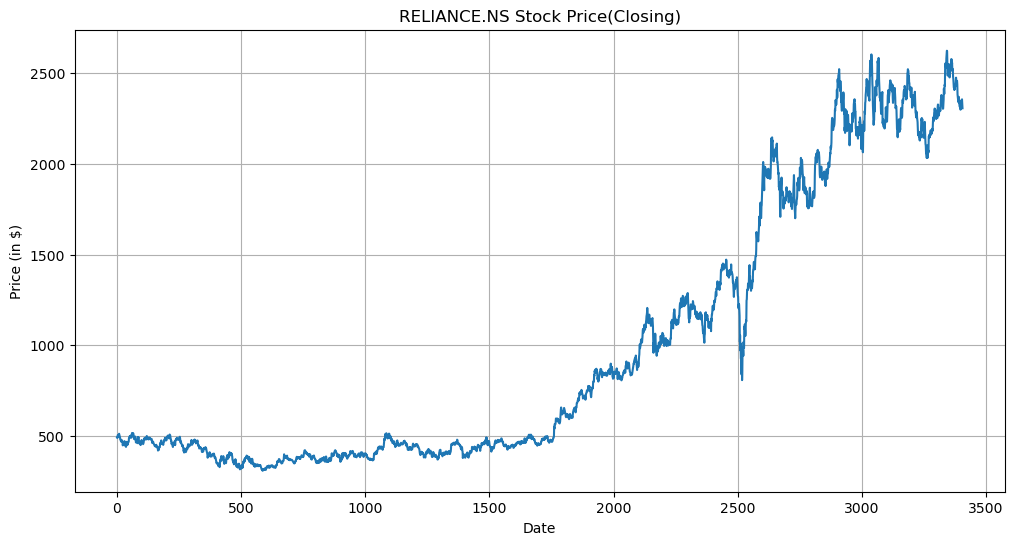

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("{} Stock Price(Closing)".format(ticker_label))
plt.xlabel("Date")
plt.ylabel("Price (in $)")
plt.grid(True)
plt.show()

In [130]:
df

,Open,High,Low,Close,Volume
0,498.814209,498.814209,467.155457,491.682404,38323043
1,525.695618,525.695618,487.065033,489.488007,10696412
2,493.693939,500.368591,489.465149,497.397003,11845880
3,497.397003,509.740479,492.825348,505.648834,13098960
4,506.540314,509.191895,501.054321,504.323059,7555074
...,...,...,...,...,...
3402,2340.000000,2357.500000,2329.149902,2349.300049,5075158
3403,2345.000000,2354.550049,2336.000000,2344.050049,2964518
3404,2356.000000,2359.699951,2341.300049,2355.250000,3964090
3405,2355.250000,2367.000000,2321.000000,2324.000000,4459160


## Spliting the dataset into training (70%) and testing (30%) set

In [131]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2384, 7)
(1023, 7)


# Using MinMax scaler for normalization of the dataset

---



In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [154]:
# Taking the 'close' price values
# train_close = train.iloc[:, 4:5].values
# test_close = test.iloc[:, 4:5].values
# test_dates = test.iloc[:, 0:1].values

train_close = train['Close'].values.reshape(-1, 1)
test_close = test['Close'].values.reshape(-1, 1)
test_dates = test['Date'].values.reshape(-1, 1)

# test.iloc[:, 0:1].values
# print(alt)
# print(type(alt))


data_training_array = scaler.fit_transform(train_close)
print(data_training_array.shape)


[[ 491.68240356]
 [ 489.48800659]
 [ 497.39700317]
 ...
 [1141.59008789]
 [1103.05102539]
 [1098.25073242]]
<class 'numpy.ndarray'>
[[ 491.68240356]
 [ 489.48800659]
 [ 497.39700317]
 ...
 [1141.59008789]
 [1103.05102539]
 [1098.25073242]]
<class 'numpy.ndarray'>
(2384, 1)

(2384, 1)
(2384, 1)


In [134]:
x_train = []
y_train = []
lookback_window_length = 50

for i in range(lookback_window_length, data_training_array.shape[0]):
    x_train.append(data_training_array[i-lookback_window_length: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [135]:
print(x_train.shape)
print(y_train.shape)
print(test_close.shape)

past_lookback_days = pd.DataFrame(train_close[-lookback_window_length:])

(2334, 50, 1)
(2334,)
(1023, 1)


In [136]:
test_df = pd.DataFrame(test_close)
print(test_df.shape)

(1023, 1)


**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [137]:
final_df = pd.concat([past_lookback_days, test_df], axis=0, ignore_index = True)
print(final_df.shape)

(1073, 1)


In [138]:
input_data = scaler.fit_transform(final_df)
print(input_data.shape)
print(input_data)

(1073, 1)
[[0.19062972]
 [0.20748329]
 [0.20662678]
 ...
 [0.85244116]
 [0.83522079]
 [0.82538445]]


In [139]:
x_test = []
y_test = []
for i in range(lookback_window_length, input_data.shape[0]):
   x_test.append(input_data[i-lookback_window_length: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(1023, 50, 1)
(1023,)
[0.15848439 0.17052628 0.17037513 ... 0.85244116 0.83522079 0.82538445]


# ML Model (LSTM)

---



In [140]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential

In [141]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units = 50, activation = 'tanh', return_sequences=True))
# model.add(Dropout(0.3))

model.add(LSTM(units = 60, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 1))

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 50)            10400     
                                                                 
 dropout_10 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 60)                26640     
                                                                 
 dropout_11 (Dropout)        (None, 60)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 37101 (144.93 KB)
Trainable params: 37101 (144.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the model

---



In [143]:
# Train the model with validation data
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
59/59 [==============================] - 5s 43ms/step - loss: 0.0031 - mean_absolute_error: 0.0384 - val_loss: 0.0131 - val_mean_absolute_error: 0.0849
Epoch 2/50
59/59 [==============================] - 2s 34ms/step - loss: 0.0010 - mean_absolute_error: 0.0229 - val_loss: 0.0281 - val_mean_absolute_error: 0.1357
Epoch 3/50
59/59 [==============================] - 2s 29ms/step - loss: 9.2491e-04 - mean_absolute_error: 0.0215 - val_loss: 0.0042 - val_mean_absolute_error: 0.0497
Epoch 4/50
59/59 [==============================] - 2s 29ms/step - loss: 7.0439e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0022 - val_mean_absolute_error: 0.0370
Epoch 5/50
59/59 [==============================] - 2s 26ms/step - loss: 7.0398e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0041 - val_mean_absolute_error: 0.0503
Epoch 6/50
59/59 [==============================] - 2s 27ms/step - loss: 6.0880e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0090 - val_mean_absolute_error: 0.0783
Epoch 

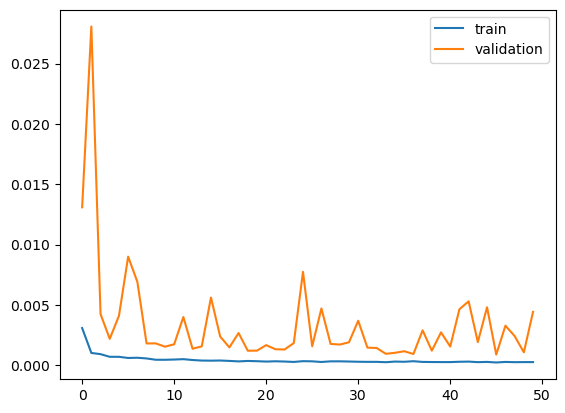

In [144]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

# Making prediction and plotting the graph of predicted vs actual values

---



In [145]:
# Making predictions
y_pred = model.predict(x_test)
print(y_pred.shape)

32/32 [==============================] - 1s 8ms/step
(1023, 1)


In [146]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

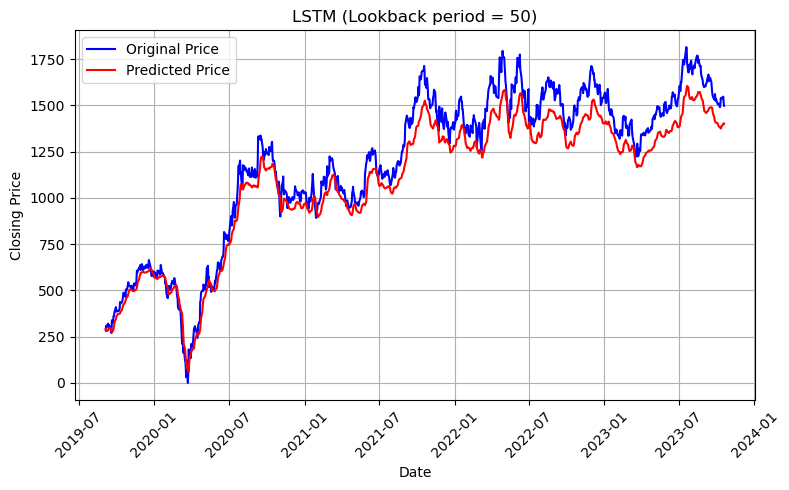

In [147]:
plt.figure(figsize = (8, 5))
plt.plot(test_dates, y_test, 'b', label = "Original Price")
plt.plot(test_dates, y_pred, 'r', label = "Predicted Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.title("LSTM (Lookback period = {})".format(lookback_window_length))
plt.tight_layout() 
plt.savefig('plot.png', bbox_inches='tight', dpi=1200)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [148]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
# mae_percentage = (mae / np.mean(y_test)) * 100
# print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))
print(mae)

97.84849836959172


Calculation of R2 score

In [149]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9222152148943605
